# Happiness Index and a Population's Internet Usage <br>
#### Data cleanup and analysis code by: <br>
> Ricardo G. Mora, Jr. <br>
#### Happiness Index Provided by: <br>
> World Happiness Report <br>
> John F Helliwell, Richard Layard, Jeffrey D. Sachs, Jan_Emmanuel De Neve, Lara B. Aknin, and Shun Wang <br>
> https://worldhappiness.report/ <br>

#### Internet Usage Data Provided by: <br>
> The World Bank / International Telecommunication Union (ITU) World Telecommunication/ICT Indicators Database <br>
> https://data.worldbank.org/indicator/IT.NET.USER.ZS
    

In [39]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.stats import linregress

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data files
internetdatafile = "Input_Data/internet_usage_data.xlsx"
happinessdatafile = "Input_Data/WHR2015-21.xlsx"
internetoutputfile = "Output_Data/cleaned_internet_usage_data.csv"
happinessoutputfile = "Output_Data/happiness_data_inclulding_intenet.csv"
plot1 = "Output_Data/internet_vs_happiness_plot.png"

#### Get Happiness data and Internet Usage data and compare countries:

In [40]:
# Read in happiness data and display
happinessdata = pd.read_excel(happinessdatafile)
happinessdata.head(2)

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834


In [41]:
# Read in internet usage data and display
internetdata = pd.read_excel(internetdatafile)
internetdata.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,69.000000,74.000000,78.900000,83.78000,88.661227,93.542454,97.170000,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.904114,8.940634,10.552158,13.05201,15.990277,17.165587,20.332119,23.657366,26.448284,NaN


In [42]:
# List all the countries in the happiness data
happinessdata["Country"].sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosov

In [43]:
# List all the countries in the happiness data
internetdata["Country Name"].sort_values().unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominica

#### Clean the  Internet Usage data and merge with Happiness data:

* Make adjustments to country names in Internet data set that don't exactly match the country names in Happiness data:

In [44]:
internetdata.replace("Congo, Dem. Rep.", "Congo (Kinshasa)", inplace=True)
internetdata.replace("Congo, Rep.", "Congo (Brazzaville)", inplace=True)
internetdata.replace("Egypt, Arab Rep.", "Egypt", inplace=True)
internetdata.replace("Gambia, The", "Gambia", inplace=True)
internetdata.replace("Hong Kong SAR, China", "Hong Kong", inplace=True)
internetdata.replace("Iran, Islamic Rep.", "Iran", inplace=True)
internetdata.replace("Kyrgyz Republic", "Kyrgyzstan", inplace=True)
internetdata.replace("Lao PDR", "Laos", inplace=True)
internetdata.replace("West Bank and Gaza", "Palestinian Territories", inplace=True)
internetdata.replace("Russian Federation", "Russia", inplace=True)
internetdata.replace("Slovak Republic", "Slovakia", inplace=True)
internetdata.replace("Korea, Rep.", "South Korea", inplace=True)
internetdata.replace("Syrian Arab Republic", "Syria", inplace=True)
internetdata.replace("Venezuela, RB", "Venezuela", inplace=True)
internetdata.replace("Yemen, Rep.", "Yemen", inplace=True)

* Normalize (unpivot) the Internet Usage data:

In [45]:
# Create new empty dataframe for internet usage data
modifieddata = pd.DataFrame(columns = ["Country", "Year", "Internet Use"])

# Append a new row to the new dataframe for every row/year combination in originaal dataframe
for index, row in internetdata.iterrows():
    for year in range(2015, 2021):
        if str(year) in internetdata.columns:
            newrow = [row["Country Name"], year, row[str(year)]]
            modifieddata.loc[len(modifieddata)] = newrow

# Drop Nan rows
modifieddata.dropna(inplace=True)
            
# Save new dataframe to csv file
modifieddata.to_csv(internetoutputfile, index=False)

# Display
modifieddata.head(2)

,Country,Year,Internet Use
0,Aruba,2015,88.661227
1,Aruba,2016,93.542454


* Merge the two data sets:

In [46]:
# Merge the internet usage dataframe with the happiness dataframe and drop NaN rows
mergeddata = pd.merge(happinessdata, modifieddata, on=["Country", "Year"], how="left")
mergeddata.dropna(inplace=True)

# Save merged data to csv file
mergeddata.to_csv(happinessoutputfile, index=False)

# Display 
mergeddata.head(2)

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Internet Use
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402,87.479056
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834,98.200000


In [47]:
print(f"Number of countries in Internet Use data before cleaning: {internetdata['Country Name'].nunique()}")
print(f"Number of countries in Internet Use data after cleaning: {modifieddata['Country'].nunique()}")
print(f"Number of countries in Happiness data before merging: {happinessdata['Country'].nunique()}")
print(f"Number of countries in Happiness data after merging: {mergeddata['Country'].nunique()}")

Number of countries in Internet Use data before cleaning: 266
Number of countries in Internet Use data after cleaning: 253
Number of countries in Happiness data before merging: 166
Number of countries in Happiness data after merging: 156


#### Determine if there is a correlation between a country's Happiness Score and the percentage of the population using the Internet:

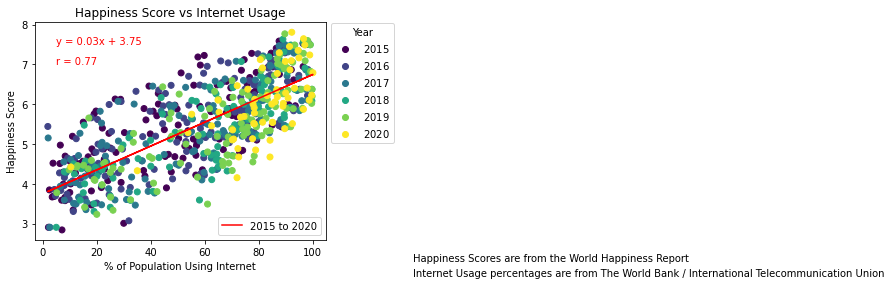

In [49]:
# Find line of regresson
(m, b, r, p, stderr) = linregress(mergeddata["Internet Use"], mergeddata["Score"])
y_regress = m * mergeddata["Internet Use"] + b

# Make scatter diagram
fig, ax = plt.subplots()
scatter = plt.scatter(mergeddata["Internet Use"], mergeddata["Score"], c=mergeddata["Year"])
plt.xlabel("% of Population Using Internet")
plt.ylabel("Happiness Score")
plt.title("Happiness Score vs Internet Usage")
legend = plt.legend(*scatter.legend_elements(), title="Year", bbox_to_anchor=(1,1.02))
ax.add_artist(legend)

# Plot line of regression
line = plt.plot(mergeddata["Internet Use"], y_regress, color="red")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(5, 7.5))
plt.annotate(f"r = {r:.2f}", color="red", xy=(5, 7.0))
plt.legend([line], labels=["2015 to 2020"], loc="lower right")

plt.figtext(1, .05, "Happiness Scores are from the World Happiness Report")
plt.figtext(1, 0, "Internet Usage percentages are from The World Bank / International Telecommunication Union")

# Display plot and save to file
plt.subplots_adjust(right=.8)
plt.savefig(plot1)
plt.show()

Observation:  There appears to be a strong correlation between a country's Happiness Score and the percentage of its population using the Internet.  However, this does not imply that internet usage directly affects the happiness score.  The more accurate implication is that countries with easier and greater access to the internet are more likely to possess the conditions that result in its citizens feeling generally happy. <br>  